In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

###**Data Collection**

In [2]:
insurance_dset = pd.read_csv('insurance.csv')
insurance_dset.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


In [3]:
insurance_dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Here, 'charges' column is the target variable. In other words, target variable is the value meant to be predicted by the model.

And, all other columns are the features. For example, 'sex', 'smoker', and 'region' are categorical features.

###**Preprocessing-1**

In [4]:
# Data Cleaning - Missing data
insurance_dset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###**Data Analysis**

In [5]:
# statistical measures of the dataset
insurance_dset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 700x600 with 0 Axes>

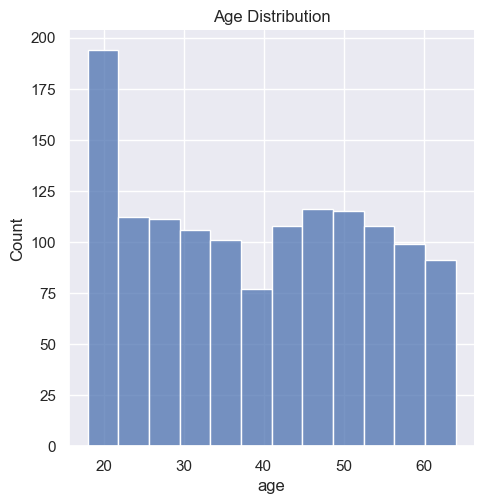

In [6]:
sns.set()                               #running set() once will apply themes to all your plots.
plt.figure(figsize = (7,6))
sns.displot(insurance_dset['age'])
plt.title('Age Distribution');

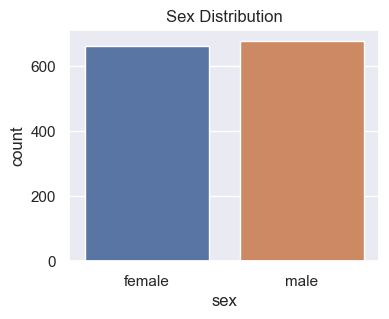

In [7]:
plt.figure(figsize = (4,3))
sns.countplot(x = 'sex', data = insurance_dset)
plt.title('Sex Distribution')
plt.show()

<Figure size 500x400 with 0 Axes>

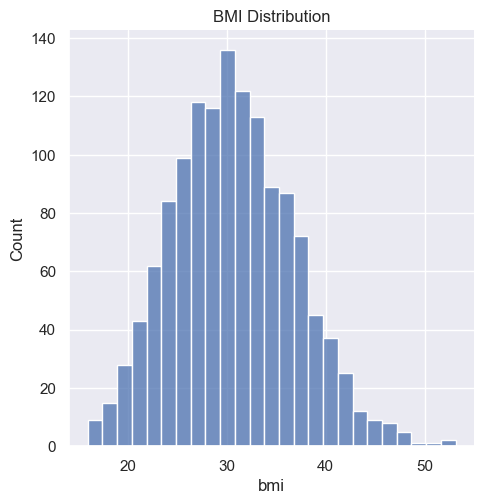

In [8]:
plt.figure(figsize = (5,4))
sns.displot(insurance_dset['bmi'])
plt.title('BMI Distribution')
plt.show()

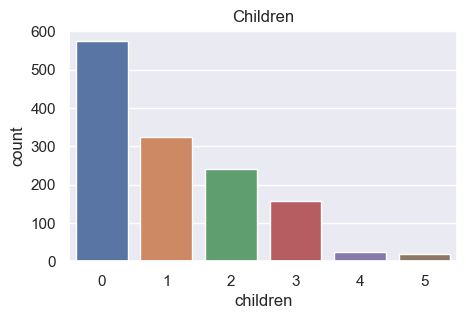

In [9]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'children', data = insurance_dset)
plt.title('Children')
plt.show()

In [10]:
insurance_dset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

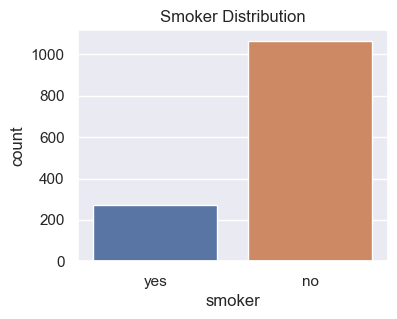

In [11]:
plt.figure(figsize = (4,3))
sns.countplot(x = 'smoker', data = insurance_dset)
plt.title('Smoker Distribution')
plt.show()

In [12]:
insurance_dset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

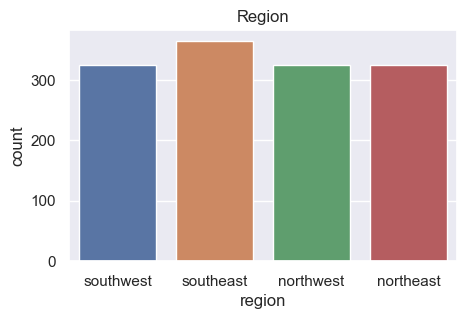

In [13]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'region', data = insurance_dset)
plt.title('Region')
plt.show()

In [14]:
insurance_dset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

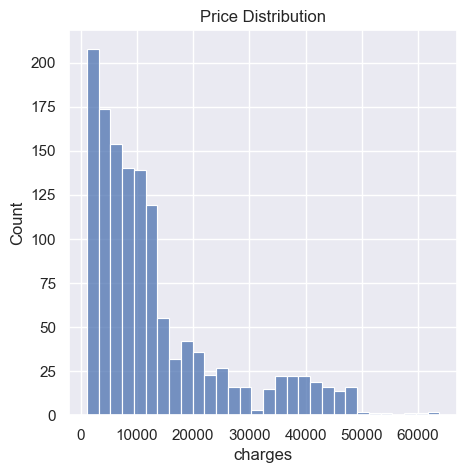

In [15]:
plt.figure(figsize = (5,5))
sns.histplot(insurance_dset['charges'])
plt.title('Price Distribution')
plt.show()

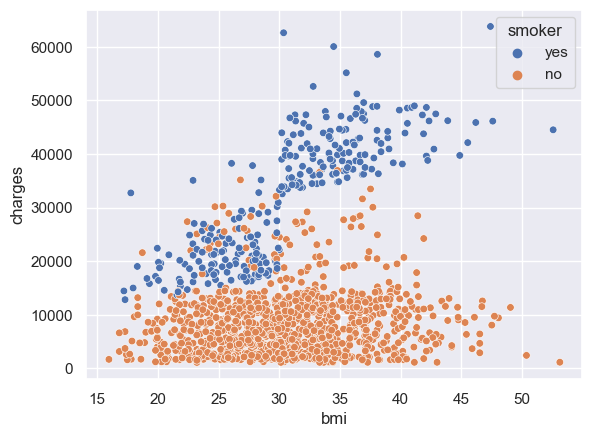

In [16]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', s = 30, data = insurance_dset)
plt.show()

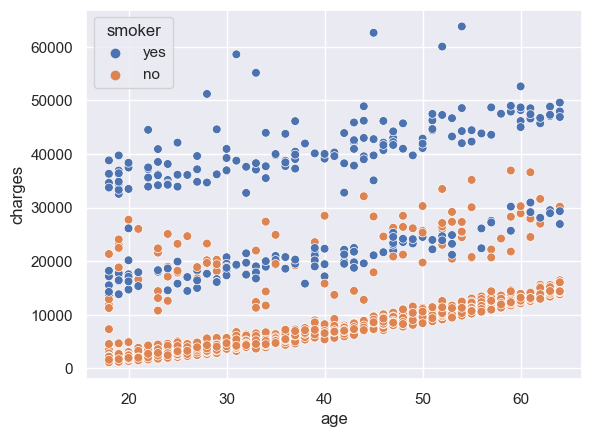

In [17]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', s = 40, data = insurance_dset)
plt.show()

###**Preprocessing-2**

Encoding the categorical features

In [18]:
insurance_dset.replace({'sex': {'male': 0, 'female': 1}}, inplace = True)
insurance_dset.replace({'smoker': {'yes': 1, 'no': 0}}, inplace = True)
insurance_dset.replace({'region': {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}}, inplace = True)
insurance_dset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


Splitting the features and target

In [19]:
x = insurance_dset.drop(columns = 'charges', axis = 1)
y = insurance_dset['charges']

In [20]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       3
1      18    0  33.770         1       0       2
2      28    0  33.000         3       0       2
3      33    0  22.705         0       0       1
4      32    0  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       1
1334   18    1  31.920         0       0       0
1335   18    1  36.850         0       0       2
1336   21    1  25.800         0       0       3
1337   61    1  29.070         0       1       1

[1338 rows x 6 columns]


In [21]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Train-Test split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


**Training: Linear Regression Model**

Equation of line: y = mx + c

where, x: input features, y: prediction probability, m: slope, c: intercept

In [23]:
model = LinearRegression()

In [24]:
model.fit(x_train, y_train)

LinearRegression()

Testing

In [25]:
lin_prediction = model.predict(x_train)

In [26]:
r2_train = metrics.r2_score(y_train, lin_prediction)
print('R squared value:', r2_train)

R squared value: 0.7519923667088932


In [27]:
lin_test = model.predict(x_test)

In [28]:
r2_test = metrics.r2_score(y_test, lin_test)
print('R squared value:', r2_test)

R squared value: 0.7445422986536502


In [29]:
input_data = (63,0,21.66,1,0,1)        #replace categorical values with numerical values
#change input_data from a tuple to a numpy array
input_array = np.asarray(input_data)
#reshape the array
input_reshaped = input_array.reshape(1,-1)
prediction = model.predict(input_reshaped)
print('Insurance cost is:', prediction[0])

Insurance cost is: 11482.93499855994


C:\Users\Deep\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###**Picking the file**

In [32]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [33]:
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [34]:
input_data = (63,0,21.66,1,0,1)
input_array = np.asarray(input_data)
input_reshaped = input_array.reshape(1,-1)
prediction = model.predict(input_reshaped)
print('Insurance cost is:', prediction[0])

Insurance cost is: 11482.93499855994


C:\Users\Deep\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
